In [3]:
# import needed libs

import seaborn as sns

# note: seaborn has some datasets within its contents. Let's check 'em out

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [4]:
# lets get some of them to work with

tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
planets = sns.load_dataset("planets")

In [6]:
# lets explore and get some information on the tips dataset for begining

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


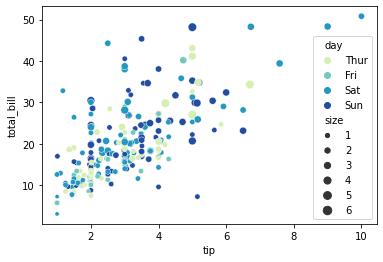

In [12]:
# well, it seems what it stands for: a dataset with meals prices, 
# it's tips whether the customer is a female or male, smokes or not;
# the day of the week and the time of the day and the size of the party

# since we have two numerical and continuos variables, let's take
# a look at them using a scatterplot and try to observe 

sns.scatterplot(
    x="tip", y="total_bill", data=tips,
    hue="day", size="size", palette="YlGnBu"

);

In [15]:
# at the first sight we can clearly see there is a relation in this:
# the bigger the total bill, the bigger the tip; generally. 
# lets try something else

# first, how balanced is this dataset in terms of sex distinction?

tips.sex.value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

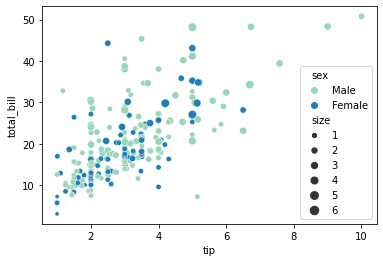

In [19]:
# ooh, there is almost twice bills paid by men than by women
# still

sns.scatterplot(
    x="tip", y="total_bill", data=tips,
    hue="sex", size="size", palette="YlGnBu"

);

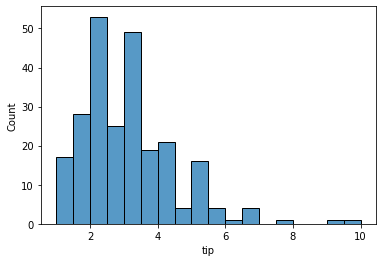

In [23]:
# Ok, doesn't seem to have anything interesting. Let's move on, shall we?
# By look at both scatterplots we can see there are a few vertical lines suggesting
# concentrations of tips about mostly 2, and maybe at 3? lets try to see it better

sns.histplot(tips['tip']);

In [24]:
# There we go. Let's just check one other thing

tips.tip.count()

244

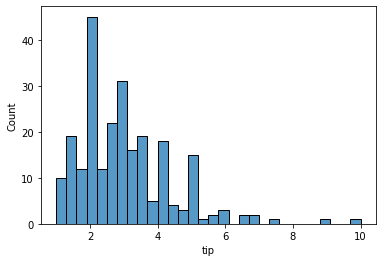

In [28]:
# Ok, so in 244 tips on this dataset, I'd say about 
# 100 are close to 2 or 3 dollars. Pretty common values
# But let's take a closer look at this increasing the number of bins

sns.histplot(tips['tip'], bins=30);

<AxesSubplot:xlabel='sex', ylabel='tip'>

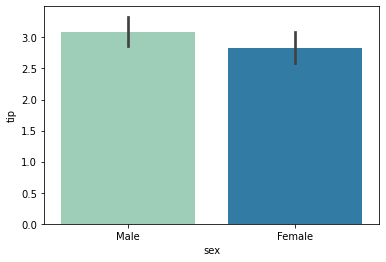

In [32]:
# Looking at the median of tips paid by man and women

sns.barplot(
    x="sex", y="tip", data=tips, palette="YlGnBu"
)

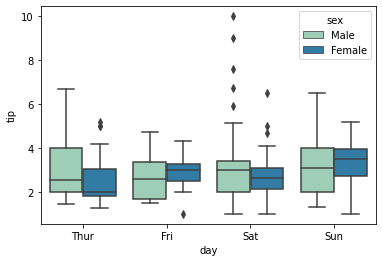

In [35]:
# We then see man usually gave slightly better tips

sns.boxplot(
    x="day", y="tip", data=tips,
    hue="sex", palette="YlGnBu"
);

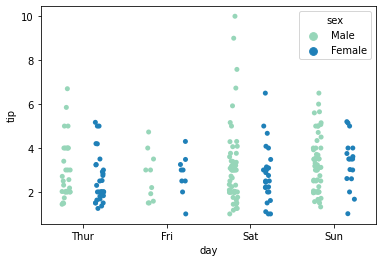

In [40]:
# By the outliers we can see on saturday people to gave better tips
# Also, a lady gave some really cheap one . What a shame
# Let's take a look on that tips in a different way

sns.stripplot(
    x="day", y="tip", data=tips, hue="sex",
    palette="YlGnBu", dodge=True
);

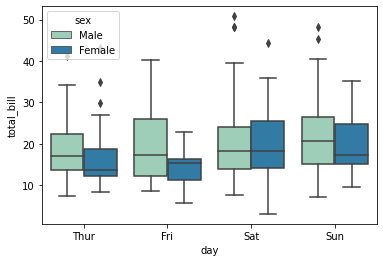

In [41]:
# What about the total bill

sns.boxplot(
    x="day", y="total_bill", data=tips,
    hue="sex", palette="YlGnBu"
);

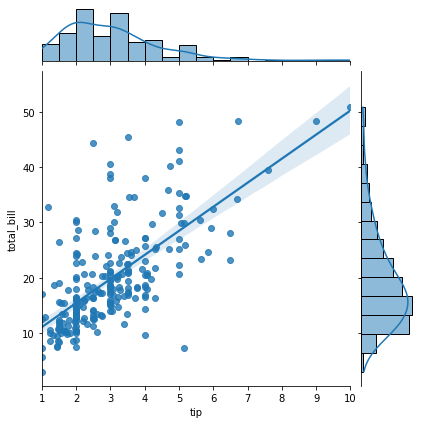

In [51]:
# And what about taking a look at both scatter and histogram plots
# at once? Seems nice. And even more, with a regression line. Awesome right?

sns.jointplot(
    x="tip", y="total_bill", data=tips, 
    kind="reg"
);

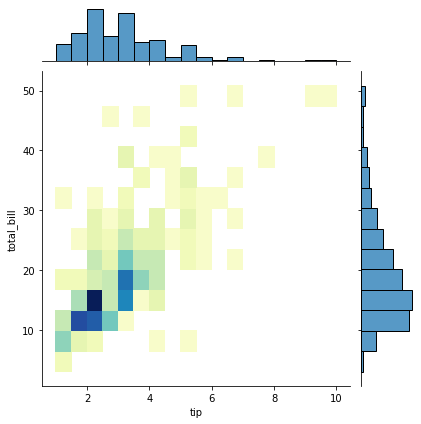

In [59]:
# Looks good hum? We can also look at this in some kind
# of heat map (even with hexagonal shape). Let's do it

sns.jointplot(
    x="tip", y="total_bill", data=tips, 
    kind="hist", cmap="YlGnBu"
);

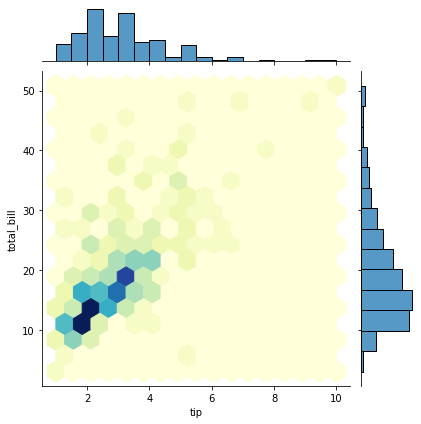

In [58]:
sns.jointplot(
    x="tip", y="total_bill", data=tips, 
    kind="hex",cmap="YlGnBu"
);

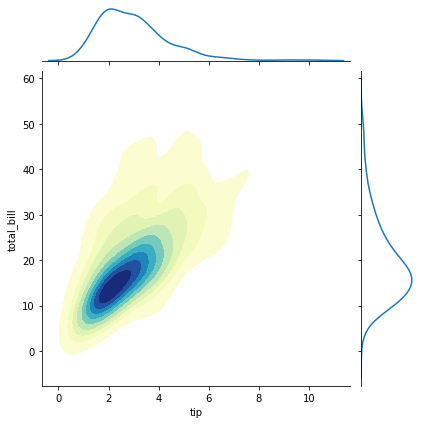

In [56]:
# And what about a level curve? That might look good.


sns.jointplot(
    x="tip", y="total_bill", data=tips, 
    kind="kde", shade=True, cmap="YlGnBu"
);

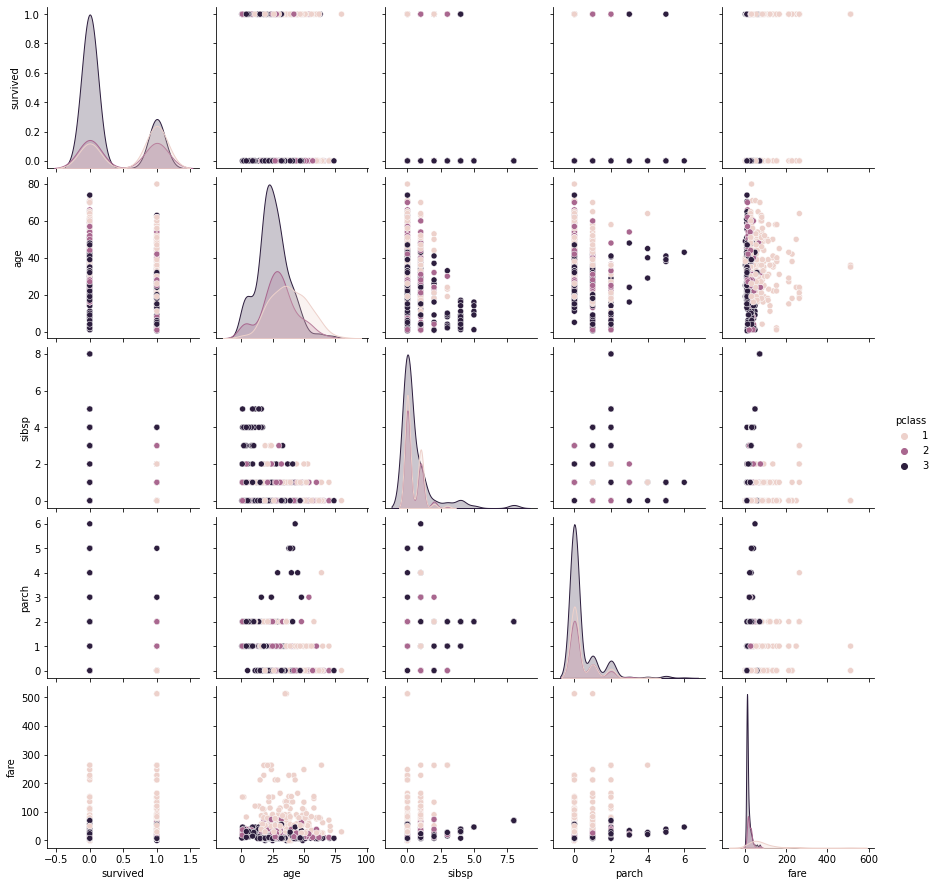

In [60]:
# Nice! What else?

sns.pairplot(titanic.select_dtypes(['number']), hue="pclass")